In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install TensorFlow Datasets (run this only once)
%pip install tensorflow_datasets -q

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
# Load the Cats vs Dogs dataset
(train, val, test), _ = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.8TEPG8_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [6]:
# Preprocessing and data augmentation
prep = lambda x, y: (tf.image.resize(x, (180, 180)) / 255, y)
aug = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2)
])

In [7]:
train = train.map(prep).map(lambda x, y: (aug(x), y)).batch(32)
val = val.map(prep).batch(32)
test = test.map(prep).batch(32)

In [8]:
# Build model for Cats vs Dogs
m1 = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train and evaluate
m1.fit(train, validation_data=val, epochs=1)
print("Test Accuracy (Cats vs Dogs):", m1.evaluate(test)[1])


582/582 ━━━━━━━━━━━━━━━━━━━━ 133s 221ms/step - accuracy: 0.5048 - loss: 1.0217 - val_accuracy: 0.4815 - val_loss: 0.6932
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5169 - loss: 0.6931
Test Accuracy (Cats vs Dogs): 0.4987102448940277


In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
# Load CIFAR-10 dataset
(x1, y1), (x2, y2) = tf.keras.datasets.cifar10.load_data()

# Data augmentation for CIFAR-10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
g = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step


In [11]:
# Build model for CIFAR-10
m2 = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
m2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Use early stopping
from tensorflow.keras.callbacks import EarlyStopping
h = m2.fit(
    g.flow(x1, y1, batch_size=64, subset='training'),
    validation_data=g.flow(x1, y1, batch_size=64, subset='validation'),
    epochs=20,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.3111 - loss: 1.8734 - val_accuracy: 0.4787 - val_loss: 1.4666
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.4743 - loss: 1.4540 - val_accuracy: 0.5317 - val_loss: 1.3195
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.5239 - loss: 1.3349 - val_accuracy: 0.5548 - val_loss: 1.2448
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5596 - loss: 1.2418 - val_accuracy: 0.5785 - val_loss: 1.1980
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.5796 - loss: 1.1845 - val_accuracy: 0.5939 - val_loss: 1.1461
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6020 - loss: 1.1284 - val_accuracy: 0.6179 - val_loss: 1.0895
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6113 - loss: 1.1002 - val_accuracy: 0.6208 - val_loss: 1.0732
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6284 - loss: 1.0675 - 

In [14]:
# Evaluate on test data
print("Test Accuracy (CIFAR-10):", m2.evaluate(x2 / 255.0, y2)[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6955 - loss: 0.8745
Test Accuracy (CIFAR-10): 0.6919999718666077


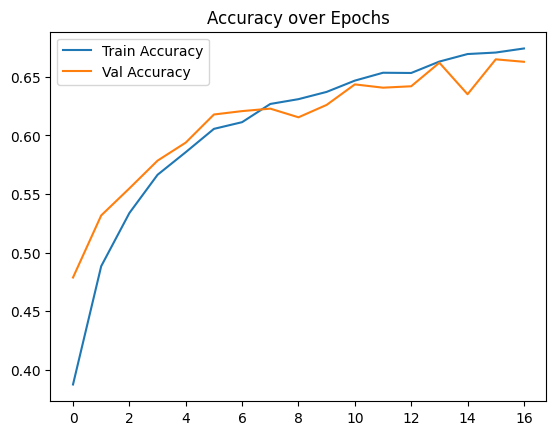

In [15]:
# Plot accuracy
plt.plot(h.history['accuracy'], label='Train Accuracy')
plt.plot(h.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


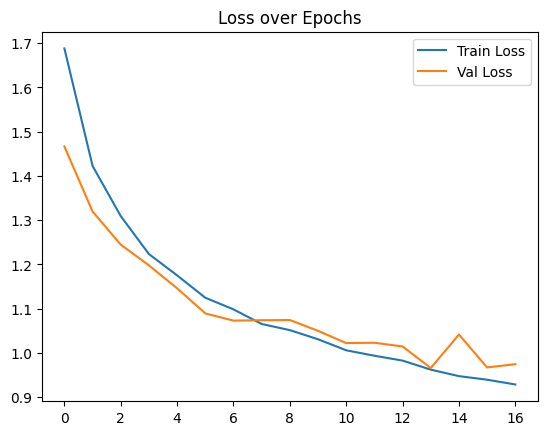

In [16]:
# Plot loss
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()